In [4]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
# defining the categories
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
#train the dataset
train = fetch_20newsgroups(subset='train', categories=categories)

#testing the dataset for these categories
test = fetch_20newsgroups(subset='test', categories = categories)

#printing the training data
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [7]:
print(test.data[5])

From: banschbach@vms.ocom.okstate.edu
Subject: Re: Candida(yeast) Bloom, Fact or Fiction
Organization: OSU College of Osteopathic Medicine
Lines: 91
Nntp-Posting-Host: vms.ocom.okstate.edu

In article <1rp8p1$2d3@usenet.INS.CWRU.Edu>, esd3@po.CWRU.Edu (Elisabeth S. Davidson) writes:
> 
> In a previous article, banschbach@vms.ocom.okstate.edu () says:
>>least a few "enlightened" physicians practicing in the U.S.  It's really 
>>too bad that most U.S. medical schools don't cover nutrition because if 
>>they did, candida would not be viewed as a non-disease by so many in the 
>>medical profession.
> 
> Case Western Reserve Med School teaches nutrition in its own section as
> well as covering it in other sections as they apply (i.e. B12
> deficiency in neuro as a cause of neuropathy, B12 deficiency in
> hematology as a cause of megaloblastic anemia), yet I sill
> hold the viewpoint of mainstream medicine:  candida can cause
> mucocutaneous candidiasis, and, in already very sick patients
> 

In [8]:
print(len(train.data))

11314


In [12]:
# importing necessary packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

#Creating a model based on Multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

#training the model with train dataset
model.fit(train.data, train.target)

#Creating labels for the test data
labels = model.predict(test.data)

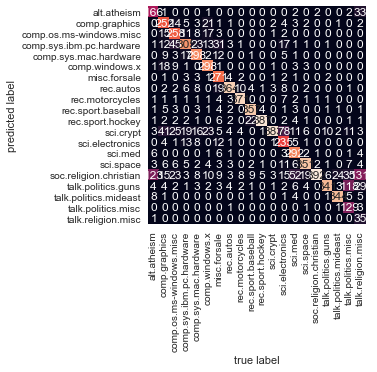

In [13]:
#Creating confusion matrix and heat map
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=train.target_names,
           yticklabels=train.target_names)

#Plotting heat map of confusion matrix
plt.xlabel('true label')
plt.ylabel('predicted label'); 

In [14]:
#Predicting category on new data based on trained model
def predict_category(s, train=train, model=model):
    pred= model.predict([s])
    return train.target_names[pred[0]]

In [15]:
# Check if we have correctly classified text into different groups based on the category they belong to
predict_category('President of India')

'talk.politics.misc'

In [16]:
predict_category('BMW is better than Audi')

'rec.autos'